# Sphere function
---
Description:

- Optimization (min)
- Single-objective
- Constraints (no)
---

The general equation is given by:

- $f(\mathbf{x}) = \sum_{i=1}^{M} x^2_i$, with  $-\infty \le x_i \le +\infty$,

and global minimum found at:

- $f(x_1, x_2, ..., x_M) = f(0, 0, ..., 0) = 0$.

### First we import python libraries and set up the directory of our code.

In [3]:
import os, sys
import numpy as np
from math import fsum, isclose
from matplotlib import pyplot as plt
import cProfile, pstats

PROJECT_DIR = os.path.abspath('..')
sys.path.append(PROJECT_DIR)

### Here we import all our custom GA code.

In [5]:
# Import main classes.
from pygenalgo.genome.gene import Gene
from pygenalgo.genome.chromosome import Chromosome
from pygenalgo.engines.standard_ga import StandardGA

# Import Selection Operator(s).
from pygenalgo.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operator(s).
from pygenalgo.operators.crossover.uniform_crossover import UniformCrossover

# Import Mutation Operator(s).
from pygenalgo.operators.mutation.random_mutator import RandomMutator

### Define the sphere function, which plays also the role of the 'fitness' function.

In addition, we define the 'boundary_x' which takes the role of the 'random()' method of the Genes. Every time
we want to 'mutate' a gene this function will be called that returns 'valid', but random values for the gene.

In [7]:
# Sphere function.
def fun_Sphere(individual: Chromosome, f_min: bool = True):
    
    # Compute the shpere function.
    f_val = fsum([xi.value**2 for xi in individual])

    # Condition for termination.
    solution_found = isclose(f_val, 0.0, rel_tol=1.0e-6)

    # Assign the fitness value (check for minimization).
    fit_value = -f_val if f_min else f_val
    
    # Return the solution tuple.
    return fit_value, solution_found
# _end_def_

Here we set the GA parameters, such as number of genes, number of chromosomes, etc. Note that in this case each
gene has the same random() function (set by 'boundary_x'). But if the problem demands otherwise it is easy to set a 
different random() function for each gene.

In [9]:
# Random number generator.
rng = np.random.default_rng()

# Random function: ~N(0,1).
# Since 'xi' are allowed to take any real value in [-inf, +inf], by setting this
# to the Normal(0, 1) essentially we can get both negative and positive values.
boundary_x = lambda: rng.normal()

# Define the number of genes.
M = 5

# Define the number of chromosomes.
N = 100

# Sample the initial points randomly.
x0_init = rng.uniform(-10.0, +10.0, size=(N, M))

# Initial population.
population = [Chromosome([Gene(x0_init[i, j], boundary_x)
                          for j in range(M)], np.nan, True)
              for i in range(N)]

# Create the StandardGA object that will carry on the optimization.
test_GA = StandardGA(initial_pop=population,
                     fit_func=fun_Sphere,
                     select_op=LinearRankSelector(),
                     mutate_op=RandomMutator(),
                     crossx_op=UniformCrossover())

### Optimization process.

Here we call the GA object (either directly, or through the method run()). We set a number of parameter, such as the maximum iterations (i.e. epochs), tolerance for the fitness convergences, etc.

In [11]:
# cProfile.run('test_GA(epochs=1000, f_tol=1.0e-8, elitism=True, adapt_probs=True)', 'output.prof')
test_GA(epochs=1000, f_tol=1.0e-8, elitism=True, adapt_probs=True)

Initial Avg. Fitness = -156.7191.
Final   Avg. Fitness = -0.6921.
Elapsed time: 9.974 seconds.


In [12]:
# Extract the optimal solution from the GA.
optimal_solution = test_GA.best_chromosome()

# Extract the fitness value from the optimal solution.
optimal_fit, _ = fun_Sphere(optimal_solution, f_min=False)

# Display the (final) optimal value.
print(f"Minimum Found: {optimal_fit:.5f}\n")

# Display each gene value separately.
for i, xi in enumerate(optimal_solution.genome, start=1):
    print(f"x{i} = {xi.value:>10.6f}")
# _end_for_

# True minimum: f(0.0, 0.0, ..., 0.0) = 0.0

Minimum Found: 0.00000

x1 =  -0.000379
x2 =   0.000244
x3 =  -0.000084
x4 =   0.000334
x5 =  -0.000386


**Note that the above solution is indeed very close to the absolute minimum!**

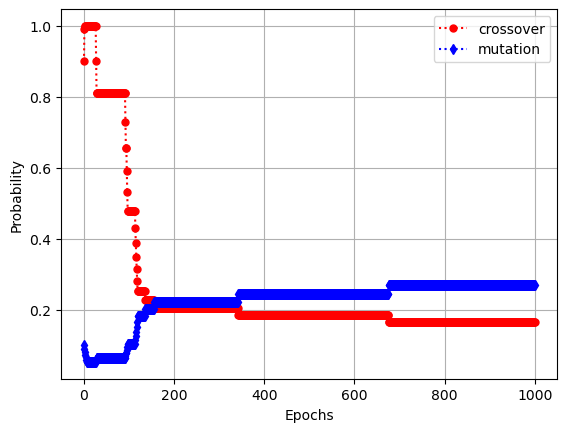

In [14]:
plt.plot(test_GA.stats["prob_crossx"],
         'ro:', markersize=5, label="crossover")
plt.plot(test_GA.stats["prob_mutate"],
         'bd:', markersize=5, label="mutation")

plt.xlabel("Epochs")
plt.ylabel("Probability")

plt.legend()
plt.grid()

In [15]:
# p = pstats.Stats('output.prof')

In [16]:
# p.sort_stats('cumtime').print_stats(20)

### End of file